# Metal 3D Printing Model
### *With autoencoder data for both layers*

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path='../Data/BoP02 Analysis KP_SCedit0306.csv'
data=pd.read_csv(file_path)
data

,SN,DoE,Block,Stripe,LASER_POWER_POLY,LASER_SPEED_POLY,LASER_SPOT_POLY,Height,Depth,Width,TotalHeight
0,BOP02_12_1,BOP02,12,1,370,1000,0.180,86.944229,73.613533,144.577911,160.557762
1,BOP02_12_2,BOP02,12,2,370,1000,0.180,58.591248,73.769890,127.483208,132.361137
2,BOP02_12_3,BOP02,12,3,370,1000,0.180,91.636681,75.602501,150.029678,167.239182
3,BOP02_13_1,BOP02,13,1,370,1000,0.180,88.413681,83.070961,155.287918,171.484642
4,BOP02_13_2,BOP02,13,2,370,1000,0.180,134.644165,59.806252,140.760055,194.450417
...,...,...,...,...,...,...,...,...,...,...,...
267,BOP02_22_6,BOP02,22,6,190,241,0.125,74.841255,349.744171,240.536469,424.585426
268,BOP02_22_9,BOP02,22,9,362,1134,0.135,56.144547,144.577911,129.981232,200.722458
269,BOP02_22_10,BOP02,22,10,362,1134,0.135,60.375683,147.160645,137.337494,207.536327
270,BOP02_22_23,BOP02,22,23,362,376,0.125,66.899353,565.748047,187.858795,632.647400


## Import data

In [9]:
file_path_162_182='../Data/162_and_182_complete_v11_all_previos_plus_autoencoder.csv'
data_162_182=pd.read_csv(file_path_162_182,low_memory=False)#56080 rows × 337 columns
data_162_182

,Frame_Index,tdms_index,Layer,x,y,apd,LaserOn,change_bool,LineIndex,LineID,...,encoder_0,encoder_1,encoder_2,encoder_3,encoder_4,encoder_5,encoder_6,encoder_7,encoder_8,encoder_9
0,0,639002,162,798,1756,1688,1,1,5554,1,...,0.126472,0.124965,0.202442,0.122546,0.267214,0.187425,0.483032,0.135109,0.171343,0.168408
1,1,639003,162,833,1759,2399,1,0,5554,1,...,0.414566,0.252620,0.386618,0.365045,0.128948,0.145017,0.284230,0.477547,0.239621,0.214533
2,2,639004,162,867,1762,3058,1,0,5554,1,...,0.403801,0.295532,0.375750,0.415691,0.109082,0.198924,0.275004,0.539477,0.338243,0.300042
3,3,639005,162,901,1765,2942,1,0,5554,1,...,0.478218,0.257299,0.455102,0.329200,0.102793,0.288820,0.279632,0.566580,0.224948,0.269998
4,4,639006,162,936,1768,2567,1,0,5554,1,...,0.370758,0.314398,0.409091,0.456760,0.098356,0.131032,0.263523,0.479126,0.239580,0.295296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56075,29685,317914,182,16882,-210,-14,0,0,2591,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56076,29686,317915,182,16882,-210,-16,0,0,2591,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56077,29687,317916,182,16882,-210,-11,0,0,2591,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56078,29688,317917,182,16882,-210,-17,0,0,2591,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
for i in data_162_182.columns:
    print(i)

Frame_Index
tdms_index
Layer
x
y
apd
LaserOn
change_bool
LineIndex
LineID
BlockID
Frame_Index.1
Area_countour_5
Area_npixels_5
Mean_5
Sum_5
Radius_5
Rotated_Box_5
Rotated_Box_side1_5
Rotated_Box_side2_5
Rotated_Box_area_5
Rotated_Box_angle_5
Rotated_Box_center_row_5
Rotated_Box_center_col_5
Ellipse_axis1_5
Ellipse_axis2_5
Ellipse_area_5
Ellipse_angle_5
Ellipse_center_row_5
Ellipse_center_col_5
Ratio_Area_npixels_rect_5
Ratio_Area_npixels_circle_5
Ratio_Area_npixels_ellipse_5
Area_countour_10
Area_npixels_10
Mean_10
Sum_10
Radius_10
Rotated_Box_10
Rotated_Box_side1_10
Rotated_Box_side2_10
Rotated_Box_area_10
Rotated_Box_angle_10
Rotated_Box_center_row_10
Rotated_Box_center_col_10
Ellipse_axis1_10
Ellipse_axis2_10
Ellipse_area_10
Ellipse_angle_10
Ellipse_center_row_10
Ellipse_center_col_10
Ratio_Area_npixels_rect_10
Ratio_Area_npixels_circle_10
Ratio_Area_npixels_ellipse_10
Area_countour_15
Area_npixels_15
Mean_15
Sum_15
Radius_15
Rotated_Box_15
Rotated_Box_side1_15
Rotated_Box_side2_15


## Data Preprocessing

In [11]:
data_162_182.drop_duplicates(inplace = True)

data_162_182.isnull().values.any() 

True

In [12]:
data_162_182=data_162_182[data_162_182.LaserOn == 1]

In [13]:
data_162_182 = data_162_182[data_162_182.Height != 0]

In [14]:
for i in data_162_182.columns:
    if data_162_182[i].isnull().values.any() == True:
        print(i)
        print(data_162_182[i].isnull().sum())

gradient_max_value_col
180
gradient_min_value_col
180
gradient_width_col
180
gradient_full_width_col
180
slope_min_max_col
180
gradient_max_value_rows
180
gradient_min_value_rows
180
gradient_width_rows
180
gradient_full_width_rows
180
slope_min_max_rows
180
encoder_0
1569
encoder_1
1569
encoder_2
1569
encoder_3
1569
encoder_4
1569
encoder_5
1569
encoder_6
1569
encoder_7
1569
encoder_8
1569
encoder_9
1569


In [15]:
data162_182 = data_162_182.set_index('Frame_Index')
data162_182.head()

,tdms_index,Layer,x,y,apd,LaserOn,change_bool,LineIndex,LineID,BlockID,...,encoder_0,encoder_1,encoder_2,encoder_3,encoder_4,encoder_5,encoder_6,encoder_7,encoder_8,encoder_9
Frame_Index,,,,,,,,,,,,,,,,,,,,,
0,639002,162,798,1756,1688,1,1,5554,1,19,...,0.126472,0.124965,0.202442,0.122546,0.267214,0.187425,0.483032,0.135109,0.171343,0.168408
1,639003,162,833,1759,2399,1,0,5554,1,19,...,0.414566,0.252620,0.386618,0.365045,0.128948,0.145017,0.284230,0.477547,0.239621,0.214533
2,639004,162,867,1762,3058,1,0,5554,1,19,...,0.403801,0.295532,0.375750,0.415691,0.109082,0.198924,0.275004,0.539477,0.338243,0.300042
3,639005,162,901,1765,2942,1,0,5554,1,19,...,0.478218,0.257299,0.455102,0.329200,0.102793,0.288820,0.279632,0.566580,0.224948,0.269998
4,639006,162,936,1768,2567,1,0,5554,1,19,...,0.370758,0.314398,0.409091,0.456760,0.098356,0.131032,0.263523,0.479126,0.239580,0.295296


In [16]:
data162_182 = data162_182[data162_182['Area_countour_5']!=-1] #delete all the threshold_5 -1 value

In [17]:
data162_182.isnull().values.any() 

False

In [18]:
X_162_182 = data162_182[data162_182.columns[~data162_182.columns.isin(['Height','Depth', 'Width', 'TotalHeight'])]]
Y_162_182 = data162_182[['Height','Depth', 'Width', 'TotalHeight']]
X_162_182.head()

,tdms_index,Layer,x,y,apd,LaserOn,change_bool,LineIndex,LineID,BlockID,...,encoder_0,encoder_1,encoder_2,encoder_3,encoder_4,encoder_5,encoder_6,encoder_7,encoder_8,encoder_9
Frame_Index,,,,,,,,,,,,,,,,,,,,,
0,639002,162,798,1756,1688,1,1,5554,1,19,...,0.126472,0.124965,0.202442,0.122546,0.267214,0.187425,0.483032,0.135109,0.171343,0.168408
1,639003,162,833,1759,2399,1,0,5554,1,19,...,0.414566,0.252620,0.386618,0.365045,0.128948,0.145017,0.284230,0.477547,0.239621,0.214533
2,639004,162,867,1762,3058,1,0,5554,1,19,...,0.403801,0.295532,0.375750,0.415691,0.109082,0.198924,0.275004,0.539477,0.338243,0.300042
3,639005,162,901,1765,2942,1,0,5554,1,19,...,0.478218,0.257299,0.455102,0.329200,0.102793,0.288820,0.279632,0.566580,0.224948,0.269998
4,639006,162,936,1768,2567,1,0,5554,1,19,...,0.370758,0.314398,0.409091,0.456760,0.098356,0.131032,0.263523,0.479126,0.239580,0.295296


In [19]:
not_feature = ['tdms_index', 'Layer', 'x', 'y', 'LaserOn', 'change_bool',
        'LineIndex', 'LineID', 'BlockID', 'Frame_Index.1',
        'Rotated_Box_5','Rotated_Box_10','Rotated_Box_15','Rotated_Box_20','Rotated_Box_25','Rotated_Box_30','Rotated_Box_35',
        'Rotated_Box_40','Rotated_Box_45','Rotated_Box_50','Rotated_Box_55','Rotated_Box_60','Rotated_Box_65','Rotated_Box_70',
        'SN', 'DoE', 'Block', 'Stripe',
        'LASER_POWER_POLY', 'LASER_SPEED_POLY','LASER_SPOT_POLY']

X_162_182 = X_162_182[X_162_182.columns[~X_162_182.columns.isin(not_feature)]]
display(X_162_182.head())

,apd,Area_countour_5,Area_npixels_5,Mean_5,Sum_5,Radius_5,Rotated_Box_side1_5,Rotated_Box_side2_5,Rotated_Box_area_5,Rotated_Box_angle_5,...,encoder_0,encoder_1,encoder_2,encoder_3,encoder_4,encoder_5,encoder_6,encoder_7,encoder_8,encoder_9
Frame_Index,,,,,,,,,,,,,,,,,,,,,
0,1688,65.5,80.0,19.2,1532.0,5.1,9.0,9.0,81.0,-90.0,...,0.126472,0.124965,0.202442,0.122546,0.267214,0.187425,0.483032,0.135109,0.171343,0.168408
1,2399,154.0,176.0,37.1,6526.0,8.7,12.0,16.0,192.0,0.0,...,0.414566,0.252620,0.386618,0.365045,0.128948,0.145017,0.284230,0.477547,0.239621,0.214533
2,3058,182.5,207.0,37.1,7686.0,10.1,13.0,19.0,247.0,0.0,...,0.403801,0.295532,0.375750,0.415691,0.109082,0.198924,0.275004,0.539477,0.338243,0.300042
3,2942,173.5,197.0,39.5,7772.0,10.1,12.1,20.1,243.2,-24.4,...,0.478218,0.257299,0.455102,0.329200,0.102793,0.288820,0.279632,0.566580,0.224948,0.269998
4,2567,176.0,200.0,37.7,7539.0,10.0,12.1,19.2,232.3,-24.4,...,0.370758,0.314398,0.409091,0.456760,0.098356,0.131032,0.263523,0.479126,0.239580,0.295296


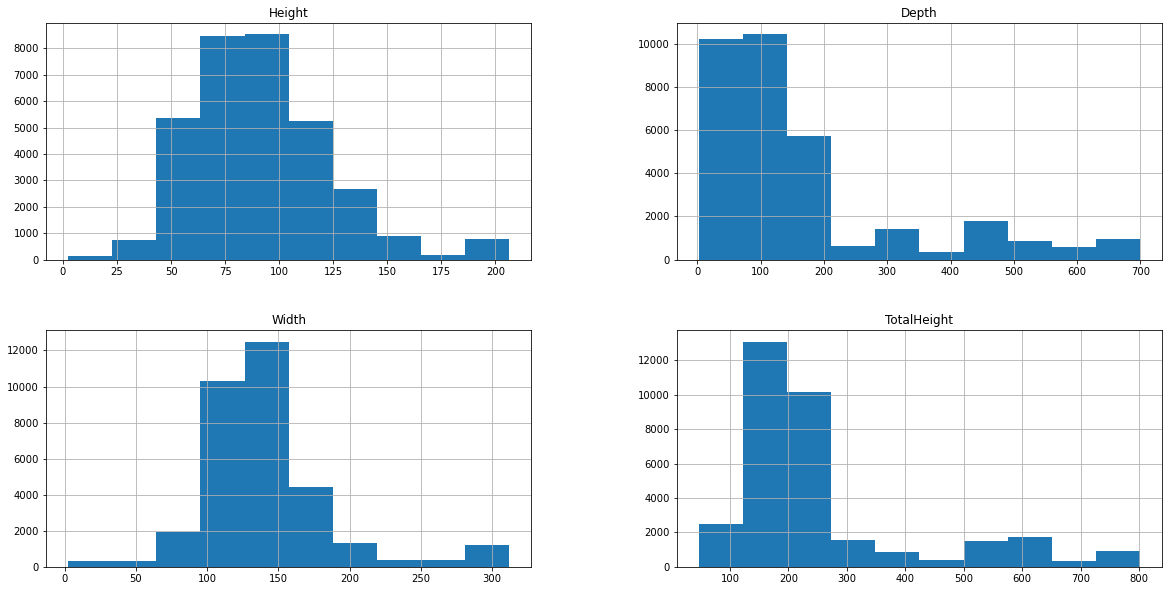

In [22]:
Y_162_182.hist(figsize=(20,10)) 
plt.show()

## LinearRegression

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [24]:
def linearRegressionModel(X,Y):   
    y_test_predict_list=[]
    y_test_list = []
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 100)
    print ('Number of samples in training data:',len(x_train))
    print ('Number of samples in validation data:',len(x_test))

    linearReg_model=linear_model.LinearRegression().fit(x_train,y_train)

    print()
    y_train_predict = linearReg_model.predict(x_train) 
    training_error= np.sqrt(mean_squared_error(y_train, y_train_predict))
    print("Training Error (RMSE) :",training_error)
    y_test_predict = linearReg_model.predict(x_test) 
    test_error= np.sqrt(mean_squared_error(y_test, y_test_predict)) 
    print("Test Error (RMSE) :",test_error)
    print()
    y_test_predict_list.append(y_test_predict)
    y_test_list.append(y_test.values)
    
    training_accuracy= linearReg_model.score(x_train, y_train) 
    #training_accuracy = r2_score(y_train, y_train_predict)
    print ('Training Accuracy:', training_accuracy)
    training_accuracy_adjusted = 1-(1-training_accuracy)*((len(x_train)-1)/(len(x_train)-len(x_train.columns)-1))
    print ('Training Accuracy Adjusted:', training_accuracy_adjusted)  
    print()
    test_accuracy= linearReg_model.score(x_test, y_test) 
    print ('Testing Accuracy:', test_accuracy)
    test_accuracy_adjusted = 1-(1-test_accuracy)*((len(x_test)-1)/(len(x_test)-len(x_test.columns)-1))
    print ('Testing Accuracy Adjusted:', training_accuracy_adjusted) 
    return y_test_predict_list,y_test_list

In [29]:
X=X_162_182
Y=Y_162_182
X.shape,Y.shape

((33007, 301), (33007, 4))

-----------All Features with Auto-----------

-----------Width Prediction-----------
Number of samples in training data: 23104
Number of samples in validation data: 9903

Training Error (RMSE) : 24.53355297177649
Test Error (RMSE) : 24.660354287981438

Training Accuracy: 0.7247207100914255
Training Accuracy Adjusted: 0.7210868592773529

Testing Accuracy: 0.7203067609107346
Testing Accuracy Adjusted: 0.7210868592773529


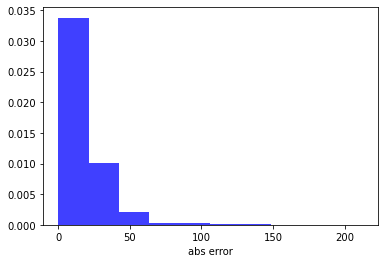

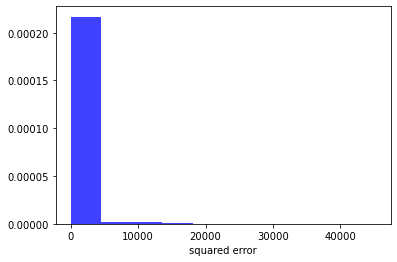

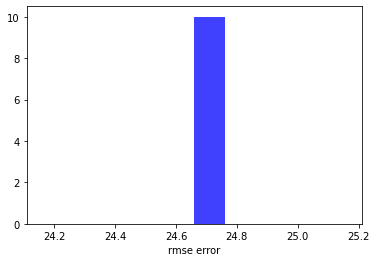

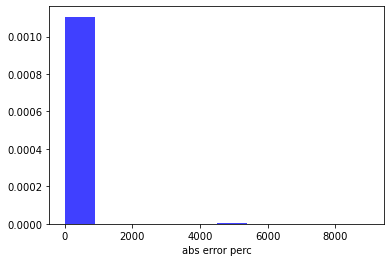

In [30]:
print('-----------All Features with Auto-----------')
print()
print('-----------Width Prediction-----------')
y_test_predict_list,y_test_list = linearRegressionModel(X,Y[['Width']])
y_test_predict=y_test_predict_list[0]
y_test=y_test_list[0]
abs_error = np.abs(y_test_predict-y_test)
squared_error = np.power(y_test_predict-y_test,2)
rmse = np.sqrt(np.mean(np.power(y_test_predict-y_test,2)))
abs_error_perc = np.round(100*np.abs((y_test_predict-y_test)/y_test),2)

plt.hist(abs_error, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('abs error')
plt.show()
plt.hist(squared_error, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('squared error')
plt.show()
plt.hist(rmse, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('rmse error')
plt.show()
plt.hist(abs_error_perc, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('abs error perc')
plt.show()

-----------Height Prediction-----------
Number of samples in training data: 23104
Number of samples in validation data: 9903

Training Error (RMSE) : 25.206899974090433
Test Error (RMSE) : 25.349149452027138

Training Accuracy: 0.39106439871358334
Training Accuracy Adjusted: 0.3830260855837171

Testing Accuracy: 0.3881003828544509
Testing Accuracy Adjusted: 0.3830260855837171


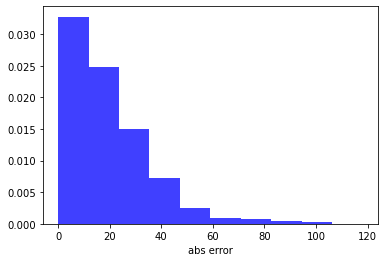

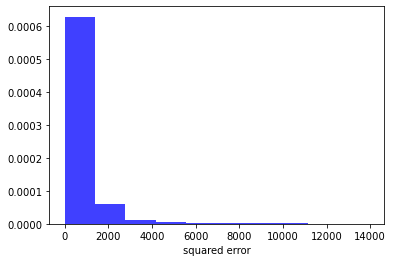

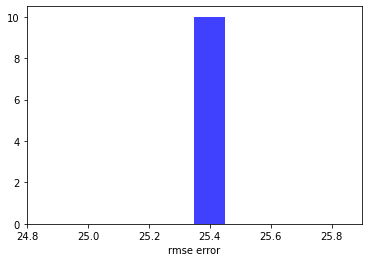

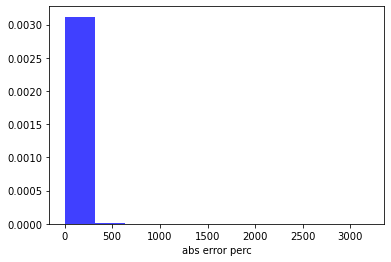

In [37]:
print('-----------Height Prediction-----------')
#linearRegressionModel(X,Y[['Height']])
y_test_predict_list,y_test_list = linearRegressionModel(X,Y[['Height']])
y_test_predict=y_test_predict_list[0]
y_test=y_test_list[0]
abs_error = np.abs(y_test_predict-y_test)
squared_error = np.power(y_test_predict-y_test,2)
rmse = np.sqrt(np.mean(np.power(y_test_predict-y_test,2)))
abs_error_perc = np.round(100*np.abs((y_test_predict-y_test)/y_test),2)

plt.hist(abs_error, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('abs error')
plt.show()
plt.hist(squared_error, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('squared error')
plt.show()
plt.hist(rmse, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('rmse error')
plt.show()
plt.hist(abs_error_perc, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('abs error perc')
plt.show()

-----------Depth Prediction-----------
Number of samples in training data: 23104
Number of samples in validation data: 9903

Training Error (RMSE) : 84.30710232832125
Test Error (RMSE) : 84.68156765447742

Training Accuracy: 0.7317079946014273
Training Accuracy Adjusted: 0.7281663801103753

Testing Accuracy: 0.7311755916937911
Testing Accuracy Adjusted: 0.7281663801103753


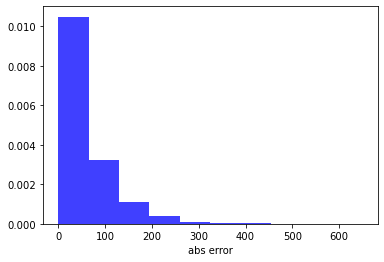

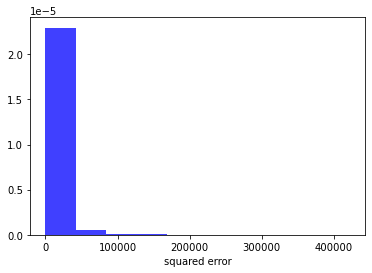

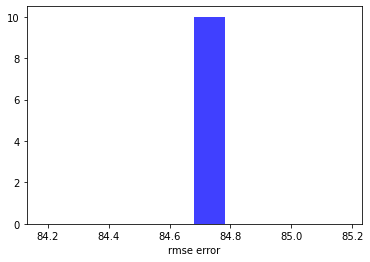

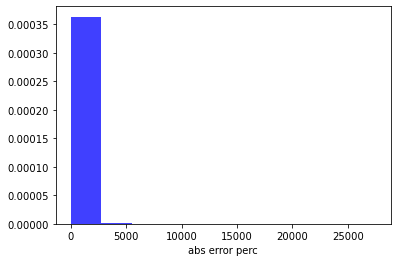

In [38]:
print('-----------Depth Prediction-----------')
#linearRegressionModel(X,Y[['Depth']])
y_test_predict_list,y_test_list = linearRegressionModel(X,Y[['Depth']])
y_test_predict=y_test_predict_list[0]
y_test=y_test_list[0]
abs_error = np.abs(y_test_predict-y_test)
squared_error = np.power(y_test_predict-y_test,2)
rmse = np.sqrt(np.mean(np.power(y_test_predict-y_test,2)))
abs_error_perc = np.round(100*np.abs((y_test_predict-y_test)/y_test),2)

plt.hist(abs_error, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('abs error')
plt.show()
plt.hist(squared_error, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('squared error')
plt.show()
plt.hist(rmse, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('rmse error')
plt.show()
plt.hist(abs_error_perc, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('abs error perc')
plt.show()

-----------TotalHeight Prediction-----------
Number of samples in training data: 23104
Number of samples in validation data: 9903

Training Error (RMSE) : 84.07791838446475
Test Error (RMSE) : 84.23689235818392

Training Accuracy: 0.7275187567930224
Training Accuracy Adjusted: 0.7239218418642749

Testing Accuracy: 0.728056780071637
Testing Accuracy Adjusted: 0.7239218418642749


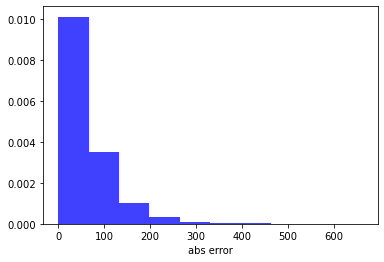

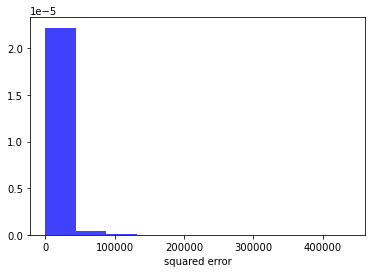

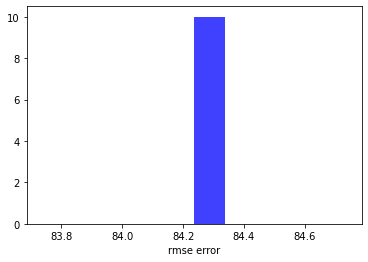

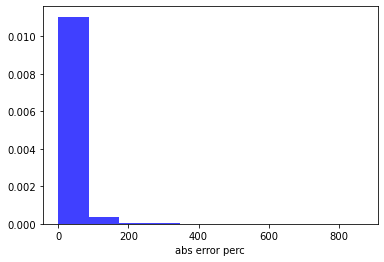

In [39]:
print('-----------TotalHeight Prediction-----------')
y_test_predict_list,y_test_list = linearRegressionModel(X,Y[['TotalHeight']])
y_test_predict=y_test_predict_list[0]
y_test=y_test_list[0]
abs_error = np.abs(y_test_predict-y_test)
squared_error = np.power(y_test_predict-y_test,2)
rmse = np.sqrt(np.mean(np.power(y_test_predict-y_test,2)))
abs_error_perc = np.round(100*np.abs((y_test_predict-y_test)/y_test),2)

plt.hist(abs_error, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('abs error')
plt.show()
plt.hist(squared_error, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('squared error')
plt.show()
plt.hist(rmse, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('rmse error')
plt.show()
plt.hist(abs_error_perc, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('abs error perc')
plt.show()

## Random Forest Regression

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

def RandomForestRegressionModel(X,Y):
    y_test_predict_list=[]
    y_test_list = []
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 100)
    print ('Number of samples in training data:',len(x_train))
    print ('Number of samples in validation data:',len(x_test))
    print()

    regr = RandomForestRegressor(max_depth=2, random_state=0).fit(X, Y.values.ravel())
    y_train_predict = regr.predict(x_train)
    training_error= np.sqrt(mean_squared_error(y_train, y_train_predict))
    print("Training Error (RMSE) :",training_error)
    y_test_predict = regr.predict(x_test) 
    test_error= np.sqrt(mean_squared_error(y_test, y_test_predict)) 
    print("Test Error (RMSE) :",test_error)
    y_test_predict_list.append(y_test_predict)
    y_test_list.append(y_test.values)

    print()
    training_accuracy= regr.score(x_train, y_train) 
    #training_accuracy = r2_score(y_train, y_train_predict)
    print ('Training Accuracy:', training_accuracy)
    training_accuracy_adjusted = 1-(1-training_accuracy)*((len(x_train)-1)/(len(x_train)-len(x_train.columns)-1))
    print ('Training Accuracy Adjusted:', training_accuracy_adjusted)  
    print()
    test_accuracy= regr.score(x_test, y_test) 
    print ('Testing Accuracy:', test_accuracy)
    test_accuracy_adjusted = 1-(1-test_accuracy)*((len(x_test)-1)/(len(x_test)-len(x_test.columns)-1))
    print ('Testing Accuracy Adjusted:', training_accuracy_adjusted)  
    return y_test_predict_list,y_test_list

In [43]:
X=X_162_182
Y=Y_162_182
X.shape,Y.shape

((33007, 301), (33007, 4))

-----------Width Prediction-----------
Number of samples in training data: 23104
Number of samples in validation data: 9903

Training Error (RMSE) : 31.87166522902372
Test Error (RMSE) : 31.961906177320852

Training Accuracy: 0.5354182408863297
Training Accuracy Adjusted: 0.5292854845713918

Testing Accuracy: 0.530161404332367
Testing Accuracy Adjusted: 0.5292854845713918


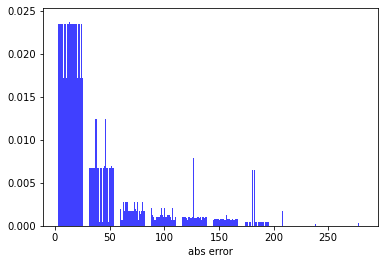

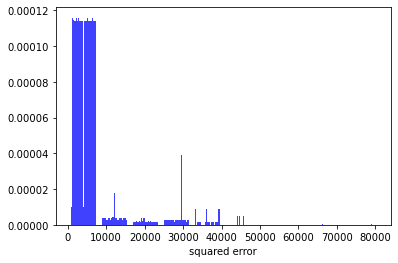

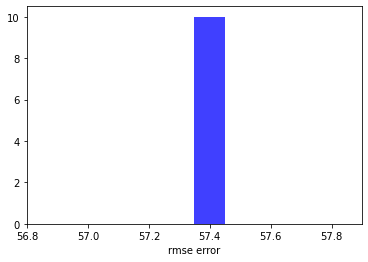

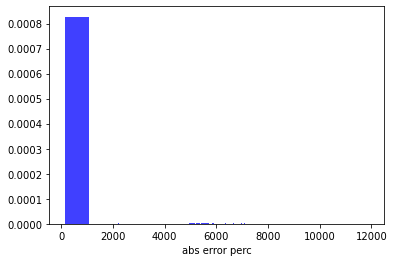

In [45]:
print('-----------Width Prediction-----------')
y_test_predict_list,y_test_list = RandomForestRegressionModel(X,Y[['Width']])
y_test_predict=y_test_predict_list[0]
y_test=y_test_list[0]
abs_error = np.abs(y_test_predict-y_test)
squared_error = np.power(y_test_predict-y_test,2)
rmse = np.sqrt(np.mean(np.power(y_test_predict-y_test,2)))
abs_error_perc = np.round(100*np.abs((y_test_predict-y_test)/y_test),2)

plt.hist(abs_error, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('abs error')
plt.show()
plt.hist(squared_error, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('squared error')
plt.show()
plt.hist(rmse, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('rmse error')
plt.show()
plt.hist(abs_error_perc, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('abs error perc')
plt.show()

-----------Height Prediction-----------
Number of samples in training data: 23104
Number of samples in validation data: 9903

Training Error (RMSE) : 27.050553678087333
Test Error (RMSE) : 26.982374270905506

Training Accuracy: 0.29873073166676267
Training Accuracy Adjusted: 0.2894735590604868

Testing Accuracy: 0.30671193826470666
Testing Accuracy Adjusted: 0.2894735590604868


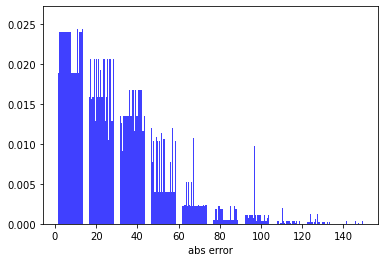

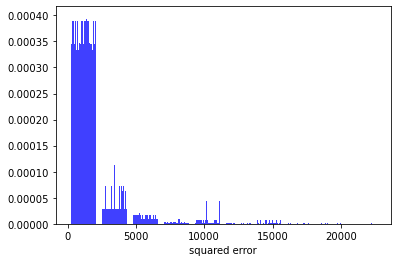

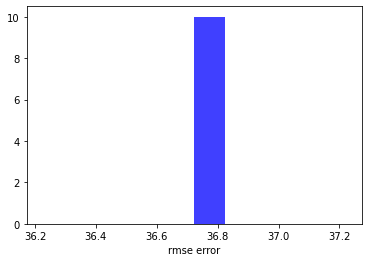

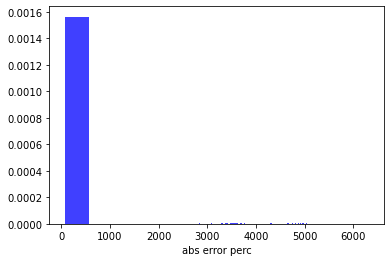

In [46]:
print('-----------Height Prediction-----------')
# RandomForestRegressionModel(X,Y[['Height']])
# print('-----------Width Prediction-----------')
y_test_predict_list,y_test_list = RandomForestRegressionModel(X,Y[['Height']])
y_test_predict=y_test_predict_list[0]
y_test=y_test_list[0]
abs_error = np.abs(y_test_predict-y_test)
squared_error = np.power(y_test_predict-y_test,2)
rmse = np.sqrt(np.mean(np.power(y_test_predict-y_test,2)))
abs_error_perc = np.round(100*np.abs((y_test_predict-y_test)/y_test),2)

plt.hist(abs_error, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('abs error')
plt.show()
plt.hist(squared_error, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('squared error')
plt.show()
plt.hist(rmse, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('rmse error')
plt.show()
plt.hist(abs_error_perc, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('abs error perc')
plt.show()

-----------Depth Prediction-----------
Number of samples in training data: 23104
Number of samples in validation data: 9903

Training Error (RMSE) : 112.83236762961207
Test Error (RMSE) : 112.3739815392683

Training Accuracy: 0.5194408962614752
Training Accuracy Adjusted: 0.5130972294679792

Testing Accuracy: 0.5266063179627694
Testing Accuracy Adjusted: 0.5130972294679792


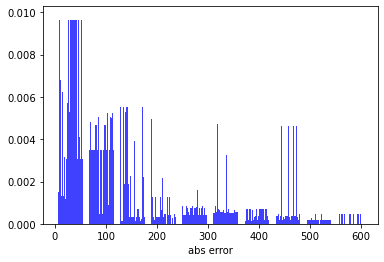

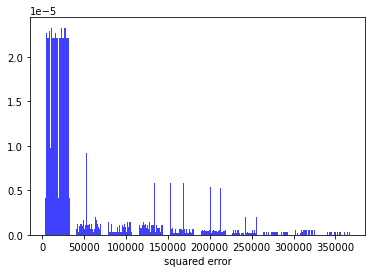

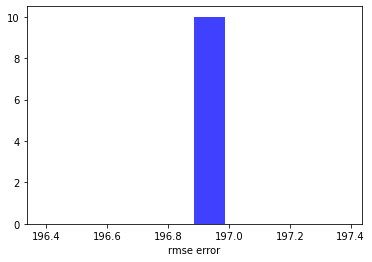

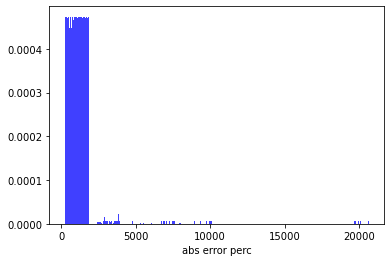

In [48]:
print('-----------Depth Prediction-----------')
#RandomForestRegressionModel(X,Y[['Depth']])
y_test_predict_list,y_test_list = RandomForestRegressionModel(X,Y[['Depth']])
y_test_predict=y_test_predict_list[0]
y_test=y_test_list[0]
abs_error = np.abs(y_test_predict-y_test)
squared_error = np.power(y_test_predict-y_test,2)
rmse = np.sqrt(np.mean(np.power(y_test_predict-y_test,2)))
abs_error_perc = np.round(100*np.abs((y_test_predict-y_test)/y_test),2)

plt.hist(abs_error, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('abs error')
plt.show()
plt.hist(squared_error, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('squared error')
plt.show()
plt.hist(rmse, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('rmse error')
plt.show()
plt.hist(abs_error_perc, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('abs error perc')
plt.show()

-----------TotalHeight Prediction-----------
Number of samples in training data: 23104
Number of samples in validation data: 9903

Training Error (RMSE) : 111.56807808803596
Test Error (RMSE) : 110.91827303515502

Training Accuracy: 0.5202084288417282
Training Accuracy Adjusted: 0.5138748939360779

Testing Accuracy: 0.5285021024733563
Testing Accuracy Adjusted: 0.5138748939360779


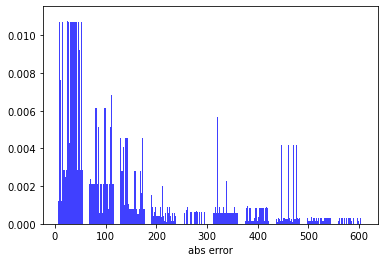

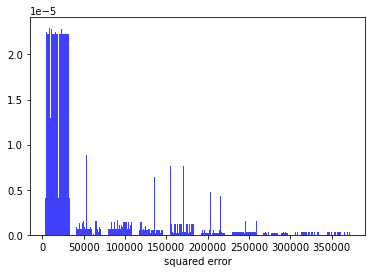

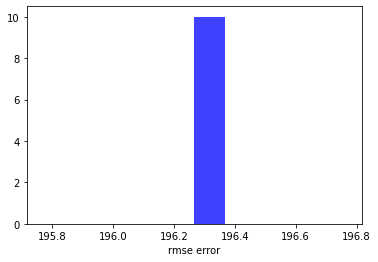

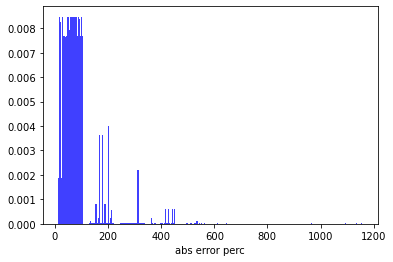

In [49]:
print('-----------TotalHeight Prediction-----------')
#RandomForestRegressionModel(X,Y[['TotalHeight']])

y_test_predict_list,y_test_list = RandomForestRegressionModel(X,Y[['TotalHeight']])
y_test_predict=y_test_predict_list[0]
y_test=y_test_list[0]
abs_error = np.abs(y_test_predict-y_test)
squared_error = np.power(y_test_predict-y_test,2)
rmse = np.sqrt(np.mean(np.power(y_test_predict-y_test,2)))
abs_error_perc = np.round(100*np.abs((y_test_predict-y_test)/y_test),2)

plt.hist(abs_error, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('abs error')
plt.show()
plt.hist(squared_error, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('squared error')
plt.show()
plt.hist(rmse, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('rmse error')
plt.show()
plt.hist(abs_error_perc, 10, density=True, facecolor='b', alpha=0.75)
plt.xlabel('abs error perc')
plt.show()

## K-Nearest Neighbors Regression

In [50]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

def KNNModel(X, Y):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 100)
    print ('Number of samples in training data:',len(x_train))
    print ('Number of samples in validation data:',len(x_test))

    rmse_val_d = {} #to store rmse values for different k
    rmse_val=[]
    for K in range(20):
        K = K+1
        model = KNeighborsRegressor(n_neighbors = K)
        model.fit(x_train, y_train)  #fit the model
        pred=model.predict(x_test) #make prediction on test set
        error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
        rmse_val_d[K]=error #store rmse values
        rmse_val.append(error)
        print('RMSE value for k = ' , K , 'is:', error)
    curve = pd.DataFrame(rmse_val,index = np.arange(1,21)) #elbow curve 
    print(curve.plot())
    neighbor = 0 
    for k,v in rmse_val_d.items():
        if v == min(rmse_val):
            print('Neighbors: ',k)
            neighbor=k
            
        
    knn = KNeighborsRegressor(n_neighbors = neighbor)
    knn.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    rmse_error = sqrt(mean_squared_error(y_test,y_pred))
    acc_knn = knn.score(x_test, y_test)
    print("Test Error (RMSE) :",rmse_error)
    print ('Testing Accuracy:', acc_knn)

In [51]:
X=X_162_182
Y=Y_162_182
X.shape,Y.shape

((33007, 301), (33007, 4))

-----------Width Prediction-----------
Number of samples in training data: 23104
Number of samples in validation data: 9903
RMSE value for k =  1 is: 28.613414153877716
RMSE value for k =  2 is: 25.25660044023074
RMSE value for k =  3 is: 24.137565065301693
RMSE value for k =  4 is: 23.457177035115947
RMSE value for k =  5 is: 23.24526670743728
RMSE value for k =  6 is: 23.174178678183992
RMSE value for k =  7 is: 23.078438536422595
RMSE value for k =  8 is: 23.06471769469109
RMSE value for k =  9 is: 23.06498695745125
RMSE value for k =  10 is: 23.04665801051576
RMSE value for k =  11 is: 23.027414558276668
RMSE value for k =  12 is: 23.032328233373214
RMSE value for k =  13 is: 23.066846465367377
RMSE value for k =  14 is: 23.135416873579757
RMSE value for k =  15 is: 23.148036646072377
RMSE value for k =  16 is: 23.1791009883652
RMSE value for k =  17 is: 23.188430476626454
RMSE value for k =  18 is: 23.247913674349054
RMSE value for k =  19 is: 23.29663465243771
RMSE value for k = 

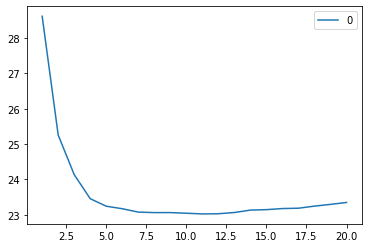

In [52]:
print('-----------Width Prediction-----------')
KNNModel(X,Y[['Width']])

-----------Depth Prediction-----------
Number of samples in training data: 23104
Number of samples in validation data: 9903
RMSE value for k =  1 is: 86.46326320599829
RMSE value for k =  2 is: 76.70464718809203
RMSE value for k =  3 is: 72.8648298458897
RMSE value for k =  4 is: 70.85612288708535
RMSE value for k =  5 is: 69.92628114770484
RMSE value for k =  6 is: 69.36203686418207
RMSE value for k =  7 is: 69.05513154847367
RMSE value for k =  8 is: 68.60570572303459
RMSE value for k =  9 is: 68.57978589744613
RMSE value for k =  10 is: 68.259314144849
RMSE value for k =  11 is: 68.14658151574912
RMSE value for k =  12 is: 67.9741213323932
RMSE value for k =  13 is: 67.9498254751852
RMSE value for k =  14 is: 67.80187527482357
RMSE value for k =  15 is: 67.75049809099927
RMSE value for k =  16 is: 67.7904263212101
RMSE value for k =  17 is: 67.82006583837091
RMSE value for k =  18 is: 68.00181277618293
RMSE value for k =  19 is: 68.12715201058057
RMSE value for k =  20 is: 68.107241

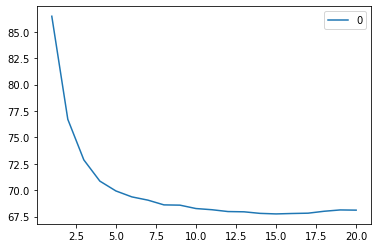

In [53]:
print('-----------Depth Prediction-----------')
KNNModel(X,Y[['Depth']])

-----------Height Prediction-----------
Number of samples in training data: 23104
Number of samples in validation data: 9903
RMSE value for k =  1 is: 31.559061132943004
RMSE value for k =  2 is: 27.394492218590816
RMSE value for k =  3 is: 25.941985033754168
RMSE value for k =  4 is: 25.21294350052462
RMSE value for k =  5 is: 24.6481782978144
RMSE value for k =  6 is: 24.383670372025293
RMSE value for k =  7 is: 24.158661236245987
RMSE value for k =  8 is: 23.996466863556726
RMSE value for k =  9 is: 23.889984605035114
RMSE value for k =  10 is: 23.852193878743815
RMSE value for k =  11 is: 23.824507261736
RMSE value for k =  12 is: 23.763690213714902
RMSE value for k =  13 is: 23.71854750013866
RMSE value for k =  14 is: 23.741483399308848
RMSE value for k =  15 is: 23.71659131598409
RMSE value for k =  16 is: 23.722777712927357
RMSE value for k =  17 is: 23.72890546684247
RMSE value for k =  18 is: 23.728685170165264
RMSE value for k =  19 is: 23.683249444132876
RMSE value for k = 

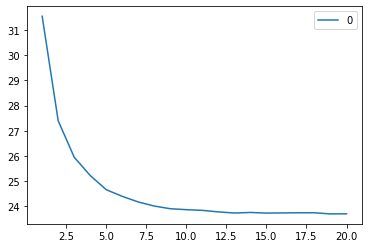

In [54]:
print('-----------Height Prediction-----------')
KNNModel(X,Y[['Height']])

-----------TotalHeight Prediction-----------
Number of samples in training data: 23104
Number of samples in validation data: 9903
RMSE value for k =  1 is: 86.30270562453931
RMSE value for k =  2 is: 76.83353884132953
RMSE value for k =  3 is: 72.89397957865312
RMSE value for k =  4 is: 70.99910526526912
RMSE value for k =  5 is: 70.09975413488651
RMSE value for k =  6 is: 69.50000836436456
RMSE value for k =  7 is: 69.1885949154722
RMSE value for k =  8 is: 68.68408871678353
RMSE value for k =  9 is: 68.65603984560984
RMSE value for k =  10 is: 68.33740135129474
RMSE value for k =  11 is: 68.20025841252216
RMSE value for k =  12 is: 68.05543410533234
RMSE value for k =  13 is: 68.00120306531537
RMSE value for k =  14 is: 67.86600701667878
RMSE value for k =  15 is: 67.78405049695722
RMSE value for k =  16 is: 67.83961288292369
RMSE value for k =  17 is: 67.87353999356962
RMSE value for k =  18 is: 68.06274574164149
RMSE value for k =  19 is: 68.18177965897392
RMSE value for k =  20 is

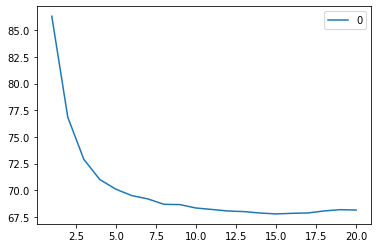

In [55]:
print('-----------TotalHeight Prediction-----------')
KNNModel(X,Y[['TotalHeight']])